In [81]:
# !pip install yfinance tensorflow

In [82]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [83]:
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)
symbol = '^NSEI'
nifty_50_data = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [84]:
nifty_50_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-03,25313.400391,25321.699219,25235.800781,25279.849609,25279.849609,212100
2024-09-04,25089.949219,25216.000000,25083.800781,25198.699219,25198.699219,253800
2024-09-05,25250.500000,25275.449219,25127.750000,25145.099609,25145.099609,222200
2024-09-06,25093.699219,25168.750000,24801.300781,24852.150391,24852.150391,311700
2024-09-09,24823.400391,24957.500000,24753.150391,24936.400391,24936.400391,0


In [85]:
nifty_50_data.shape

(4161, 6)

In [86]:
nifty_50_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4.161000e+03
mean,9849.688813,9903.155973,9780.629841,9843.589367,9843.589367,2.035943e+05
std,5237.886142,5250.739403,5216.582405,5235.360748,5235.360748,2.096877e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5565.700195,5605.950195,5519.399902,5561.049805,5561.049805,0.000000e+00
50%,8390.950195,8429.500000,8334.950195,8373.650391,8373.650391,1.753000e+05
75%,11905.799805,11946.799805,11823.450195,11896.450195,11896.450195,2.844000e+05
max,25333.599609,25333.650391,25235.800781,25279.849609,25279.849609,1.811000e+06


In [87]:
nifty_50_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4161 entries, 2007-09-17 to 2024-09-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4161 non-null   float64
 1   High       4161 non-null   float64
 2   Low        4161 non-null   float64
 3   Close      4161 non-null   float64
 4   Adj Close  4161 non-null   float64
 5   Volume     4161 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 227.6 KB


In [88]:
def plot_graph(column_name):
  nifty_50_data[column_name].plot(figsize=(10,5))
  plt.xlabel('Date')
  plt.ylabel(column_name)
  plt.title('{0} of Nifty 50'.format(column_name))
  plt.show()

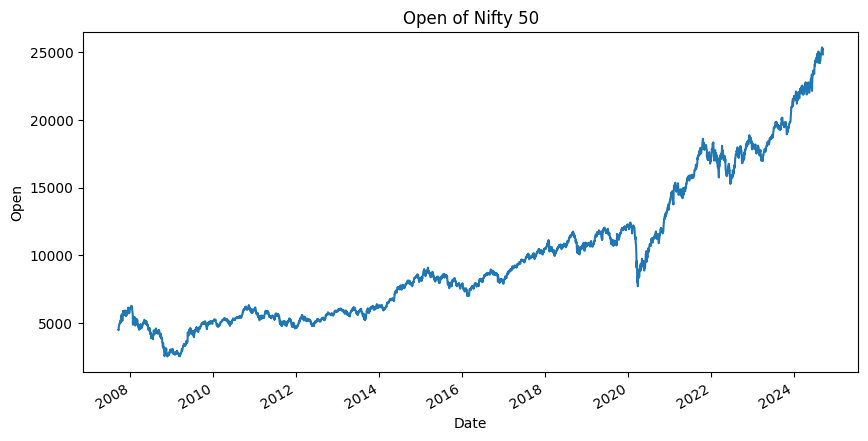

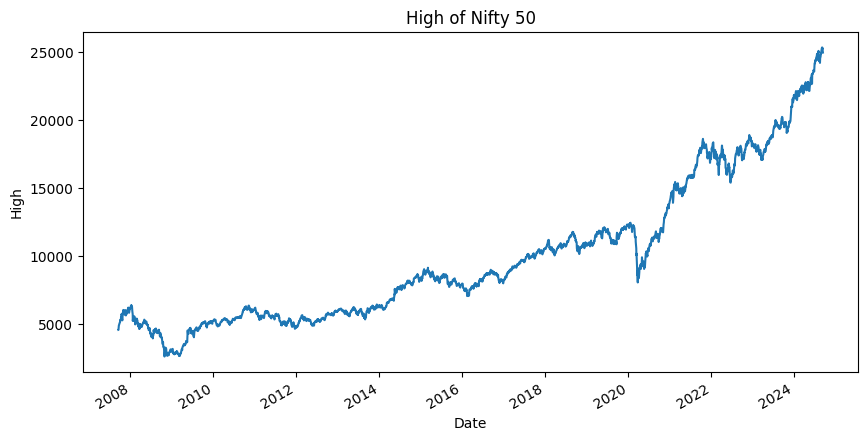

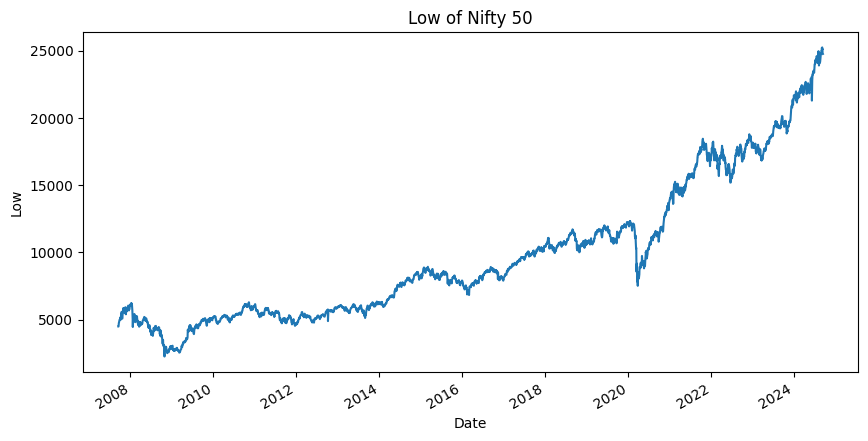

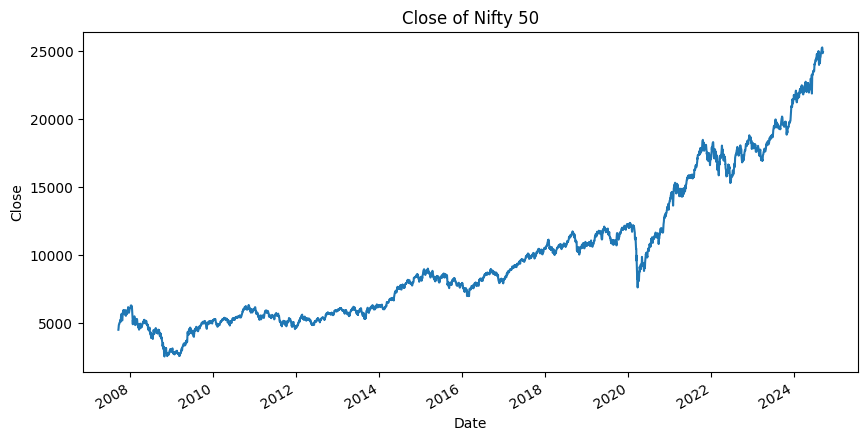

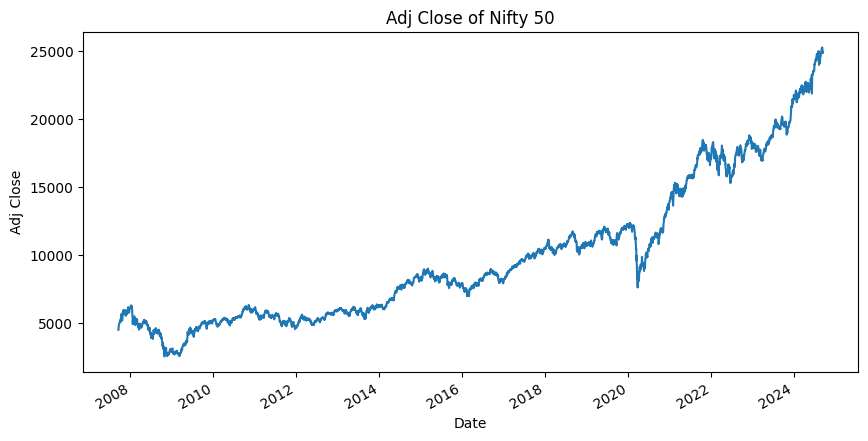

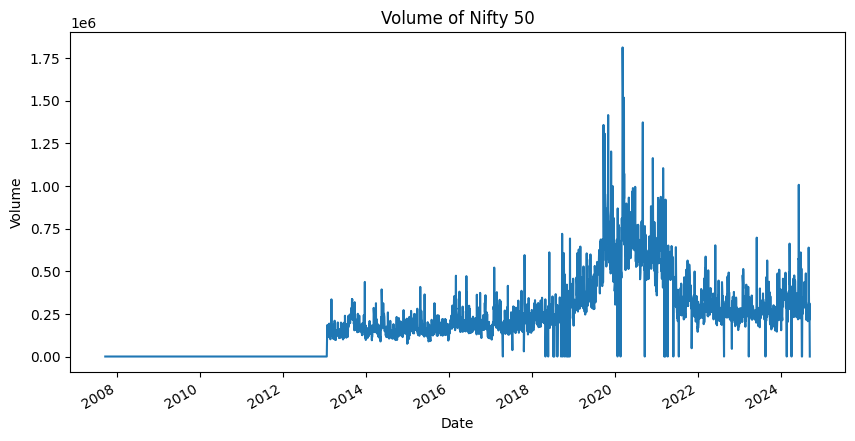

In [89]:
# for column in nifty_50_data.columns:
#   plot_graph(column)
for col in nifty_50_data.columns:
  plot_graph(col)

# COVID AND ITS EFFECTS ON NIFTY 50

In [90]:
bear_df = nifty_50_data[(nifty_50_data.index>'2020-01-01') & (nifty_50_data.index<'2021-01-01')]
bear_df = bear_df.iloc[bear_df['Adj Close'].argmin()-20:bear_df['Adj Close'].argmin()+20,:]
bear_df.shape

(40, 6)

Text(0.5, 1.0, 'VOLUME TRADED OF NIFTY 50')

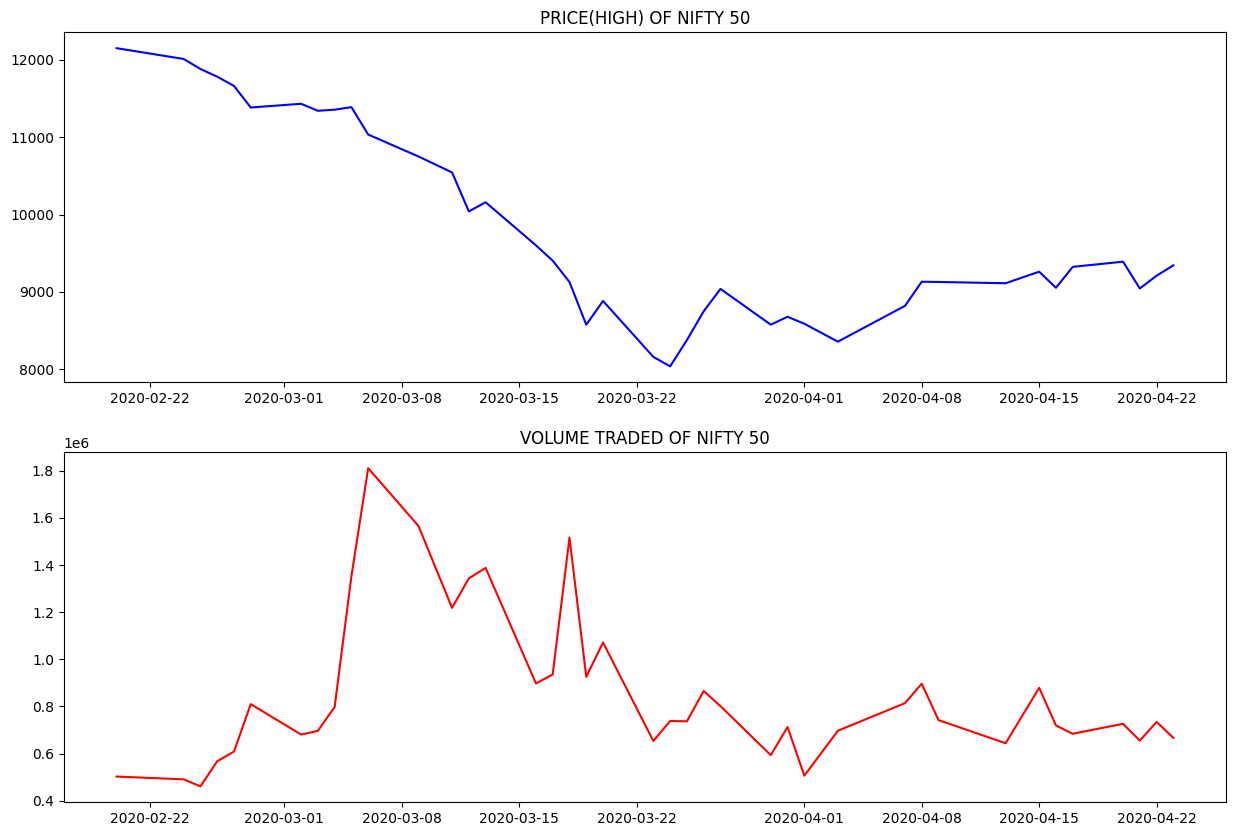

In [91]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
ax = ax.flatten()
ax[0].plot(bear_df['High'],color='b',label='High')
ax[1].plot(bear_df['Volume'],color='r',label='Volume')
ax[0].set_title('PRICE(HIGH) OF NIFTY 50')
ax[1].set_title('VOLUME TRADED OF NIFTY 50')

# Moving Average

In [92]:
# calculate MA
def moving_average(i):
  a=[]
  a.append(nifty_50_data['Adj Close'].rolling(window=i).mean())
  return a
def plot_ma(i):
  fig,ax = plt.subplots(figsize=(10,5))
  ax.plot(nifty_50_data['Adj Close'][i:],label='ADJ HIGH',color='r')
  ax.plot(moving_average(i)[0],label='MA {0}'.format(i),color='b')

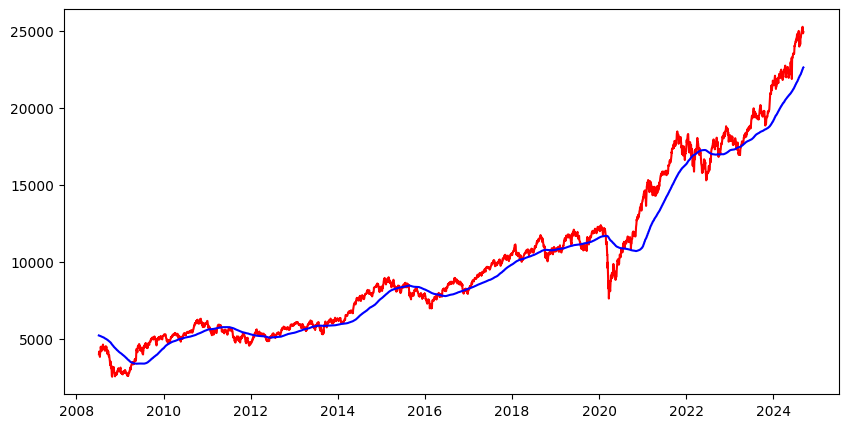

In [93]:
plot_ma(200)

Text(0.5, 1.0, 'Percentage Change in Adj Close')

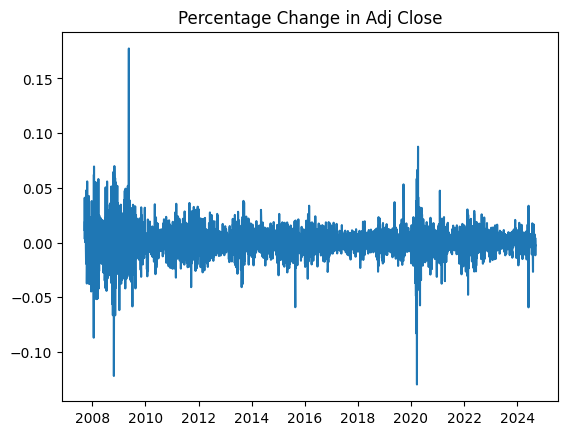

In [94]:
nifty_50_data['percentage-change'] = nifty_50_data['Adj Close'].pct_change()
plt.plot(nifty_50_data['percentage-change'])
plt.title('Percentage Change in Adj Close')

# Preprocessing Data

In [95]:
adj_close = nifty_50_data[['Adj Close']]
max(adj_close.values),min(adj_close.values)

(array([25279.84960938]), array([2524.19995117]))

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(adj_close)
scaled_data

array([[0.08659168],
       [0.08885707],
       [0.09703745],
       ...,
       [0.99407839],
       [0.9812047 ],
       [0.98490708]])

In [97]:
len(scaled_data)

4161

In [98]:
x = []
y = []
for i in range(100,len(scaled_data)):
  x.append(scaled_data[i-100:i])
  y.append(scaled_data[i])
x,y=np.array(x),np.array(y)

# Training Testing Split

In [99]:
split_index = int(len(scaled_data)*0.75)
# Train
x_train = x[:split_index]
y_train = y[:split_index]
# Test
x_test = x[split_index:]
y_test = y[split_index:]

In [100]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3120, 100, 1), (941, 100, 1), (3120, 1), (941, 1))

# Training Model

In [101]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [102]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [103]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [104]:
model.fit(x_train,y_train,epochs=2,batch_size=1)

Epoch 1/2
3120/3120 [==============================] - 148s 46ms/step - loss: 2.6550e-04
Epoch 2/2
3120/3120 [==============================] - 140s 45ms/step - loss: 1.0560e-04


In [105]:
x_train.shape

(3120, 100, 1)

In [106]:
pred = model.predict(x_test)

30/30 [==============================] - 3s 62ms/step


In [107]:
pred_inv = scaler.inverse_transform(pred)
y = scaler.inverse_transform(y_test)
(pred_inv[:5],y[:5])

(array([[12557.689 ],
        [12644.55  ],
        [12733.619 ],
        [12675.333 ],
        [12682.3545]], dtype=float32),
 array([[12874.20019531],
        [12938.25      ],
        [12771.70019531],
        [12859.04980469],
        [12926.45019531]]))

In [108]:
rsme = np.sqrt(np.mean(pred_inv-y)**2)
rsme

304.0669728845643

In [109]:
pred_vs_actual = pd.DataFrame({'Predicted':pred_inv.ravel(),'Actual':y.ravel()},index=nifty_50_data.index[split_index+100:])
pred_vs_actual.tail()

,Predicted,Actual
Date,,
2024-09-03,24576.462891,25279.849609
2024-09-04,24588.507812,25198.699219
2024-09-05,24530.195312,25145.099609
2024-09-06,24464.994141,24852.150391
2024-09-09,24250.935547,24936.400391


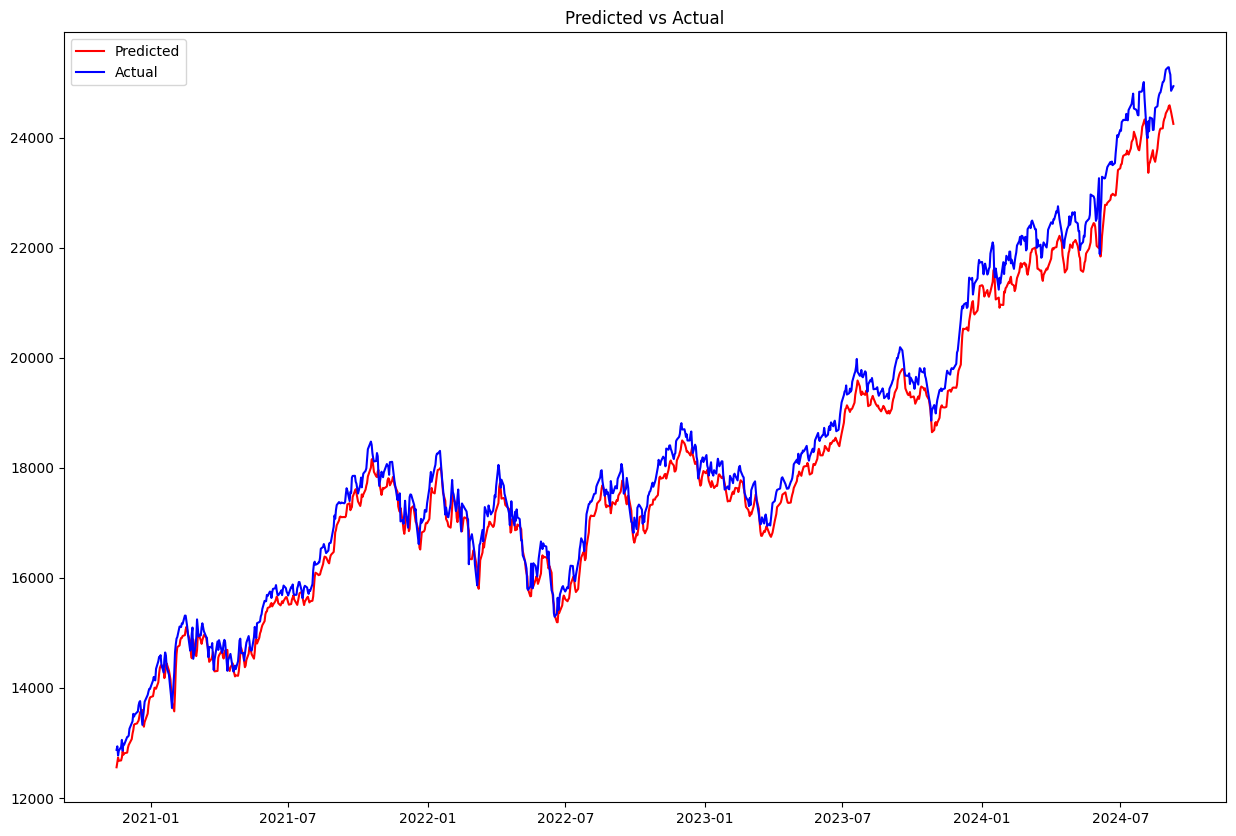

In [110]:
fig, ax = plt.subplots(figsize=(15, 10))  # Set figsize here
ax.plot(pred_vs_actual['Predicted'], label='Predicted', color='r')
ax.plot(pred_vs_actual['Actual'], label='Actual', color='b')
ax.set_title('Predicted vs Actual')
ax.legend()  # Add legend to show labels
plt.show()  # To display the plot

In [111]:
plot_data = pd.concat([adj_close[:split_index+100],pred_vs_actual], axis=0)

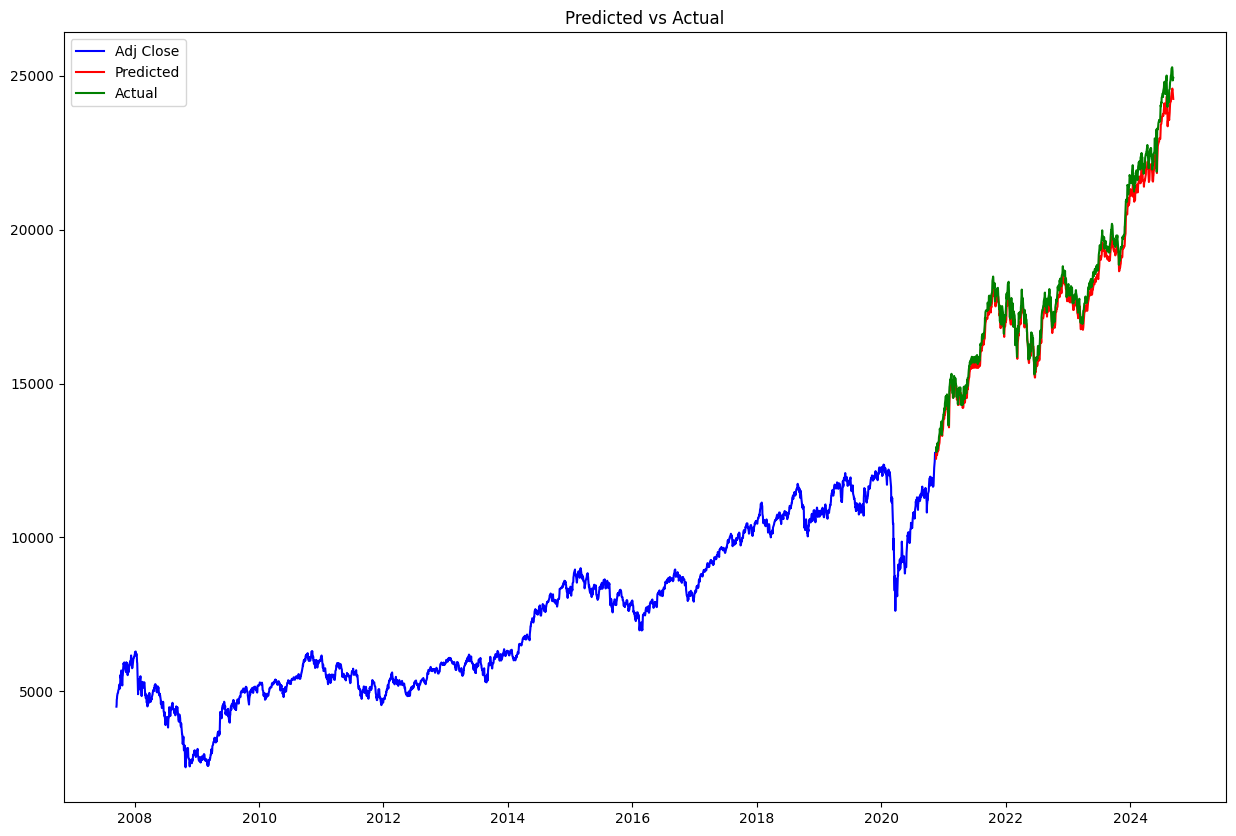

In [112]:
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(plot_data['Adj Close'],label='Adj Close',color='b')
ax.plot(plot_data['Predicted'],label='Predicted',color='r')
ax.plot(plot_data['Actual'],label='Actual',color='g')
ax.set_title('Predicted vs Actual')
ax.legend()

# Predicting adj close for tomorrow

In [113]:
last_100_days = scaled_data[-100:].reshape(1,100,1)
x = model.predict(last_100_days)
x = scaler.inverse_transform(x)
x

1/1 [==============================] - 0s 42ms/step


array([[24221.934]], dtype=float32)

In [114]:
model.save("nifty50.keras")